In [1]:
!pip install anai-opensource  https://anai-wheels.s3.ap-south-1.amazonaws.com/TensorFM-1.0.4-py3-none-any.whl

  Using cached https://anai-wheels.s3.ap-south-1.amazonaws.com/TensorFM-1.0.4-py3-none-any.whl (7.1 kB)
  Using cached anai_opensource-0.1.7.2-py3-none-any.whl.metadata (8.1 kB)
  Using cached catboost-1.2.5-cp39-cp39-win_amd64.whl.metadata (1.2 kB)
  Using cached datashape-0.5.2-py3-none-any.whl
  Using cached db_dtypes-1.2.0-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached google_cloud_bigquery-3.25.0-py2.py3-none-any.whl.metadata (8.9 kB)
  Using cached google_cloud_bigquery_storage-2.25.0-py2.py3-none-any.whl.metadata (5.6 kB)
  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached optuna-3.6.1-py3-none-any.whl.metadata (17 kB)
  Using cached pydotplus-2.0.2-py3-none-any.whl
  Using cached shap-0.46.0-cp39-cp39-win_amd64.whl.metadata (25 kB)
  Using cached xgboost-2.1.0-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached pyod-2.0.1-py3-none-any.whl
  Using cached modin-0.31.0-

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1 requires sympy, which is not installed.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 2.3.1 which is incompatible.


In [1]:
import pandas as pd

In [2]:
errors= pd.read_csv(r'C:\Users\shash\Deep_Learning\Predictive-maintenance-using-ML\maintain_data\PdM_errors.csv')
failures= pd.read_csv(r'C:\Users\shash\Deep_Learning\Predictive-maintenance-using-ML\maintain_data\pdM_failures.csv')
machines= pd.read_csv(r'C:\Users\shash\Deep_Learning\Predictive-maintenance-using-ML\maintain_data\pdM_machines.csv')
maint= pd.read_csv(r'C:\Users\shash\Deep_Learning\Predictive-maintenance-using-ML\maintain_data\PdM_maint.csv')
telemetry= pd.read_csv(r'C:\Users\shash\Deep_Learning\Predictive-maintenance-using-ML\maintain_data\PdM_telemetry.csv')

# EDA on Errors Data

In [3]:
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [4]:
errors['datetime']= pd.to_datetime(
    errors['datetime'], format="%Y-%m-%d %H:%M:%S")

errors['errorID']= errors['errorID'].astype('object')

print("Error Records count: %d" %len(errors.index))
errors.head()

Error Records count: 3919


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [5]:
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

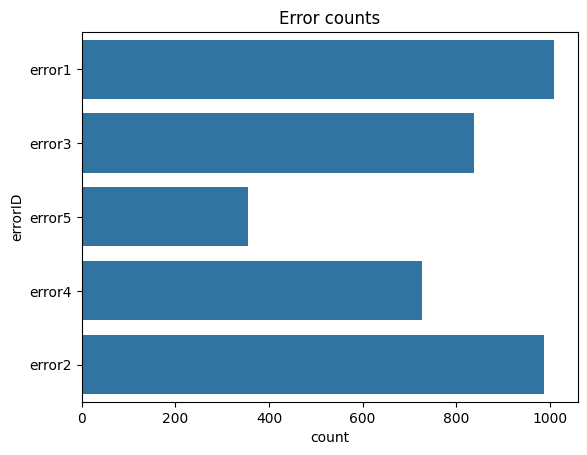

In [6]:
sns.countplot(errors['errorID'])
plt.title("Error counts")
plt.show()

# EDA on Failure dataset

In [7]:
failures['datetime']= pd.to_datetime(failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure']= failures['failure'].astype('object')

print("Total number of failures: %d"%len(failures.index))
failures.head()

Total number of failures: 761


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


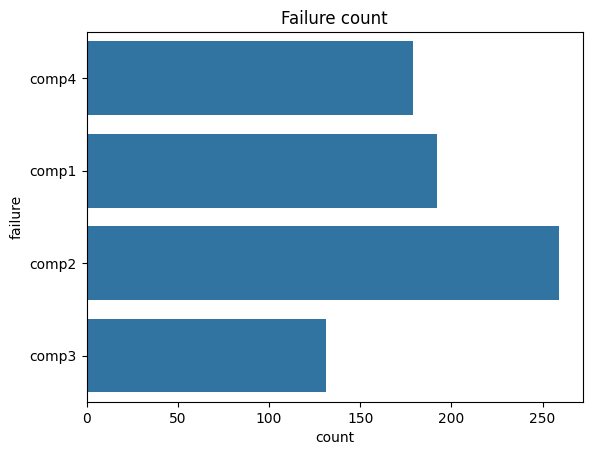

In [8]:
sns.countplot(failures['failure'])
plt.title("Failure count")
plt.show()

# EDA On Machine Data

In [9]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [10]:
machines.shape

(100, 3)

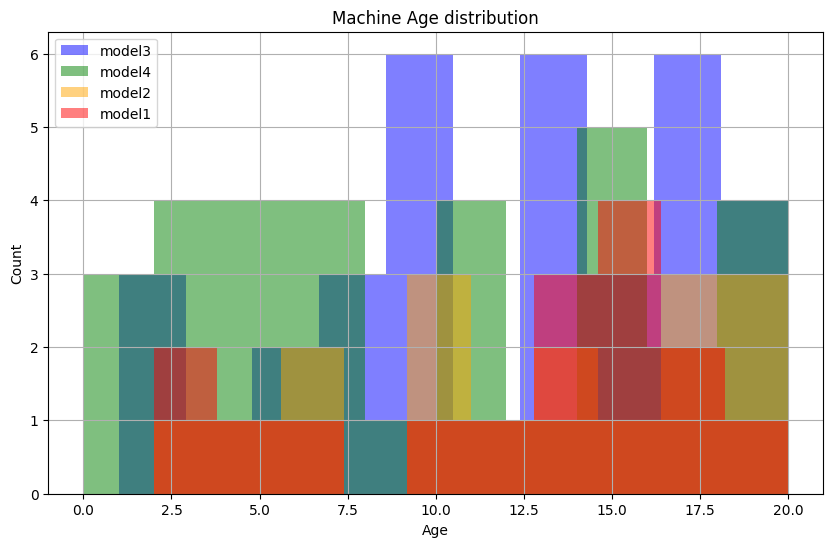

In [11]:
plt.figure(figsize=(10, 6))

models= machines['model'].unique()
colors=['blue', 'green', 'orange','red']

for i, model in enumerate(models):
    plt.hist(machines[machines['model']==model]['age'], bins=10, alpha=0.5, color= colors[i], label=model)


plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Machine Age distribution')
plt.legend()
plt.grid(True)

# EDA on Maint Data

In [12]:
maint['datetime']= pd.to_datetime(maint['datetime'], format="%Y-%m-%d %H:%M:%S")
maint['comp']= maint['comp'].astype('object')

In [13]:
print("Size:",maint.shape)
maint.head()

Size: (3286, 3)


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


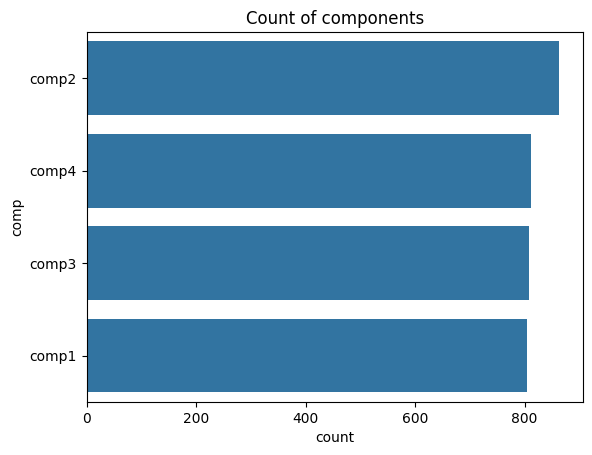

In [14]:
sns.countplot(maint['comp'])
plt.title("Count of components")
plt.show()

# EDA on Telemetry Data

In [15]:
telemetry['datetime']= pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

In [16]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [17]:
telemetry.shape

(876100, 6)

In [18]:
telemetry.describe()

,datetime,machineID,volt,rotate,pressure,vibration
count,876100,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,2015-07-02 18:00:00,50.500000,170.777736,446.605119,100.858668,40.385007
min,2015-01-01 06:00:00,1.000000,97.333604,138.432075,51.237106,14.877054
25%,2015-04-02 12:00:00,25.750000,160.304927,412.305714,93.498181,36.777299
50%,2015-07-02 18:00:00,50.500000,170.607338,447.558150,100.425559,40.237247
75%,2015-10-02 00:00:00,75.250000,181.004493,482.176600,107.555231,43.784938
max,2016-01-01 06:00:00,100.000000,255.124717,695.020984,185.951998,76.791072
std,NaN,28.866087,15.509114,52.673886,11.048679,5.370361


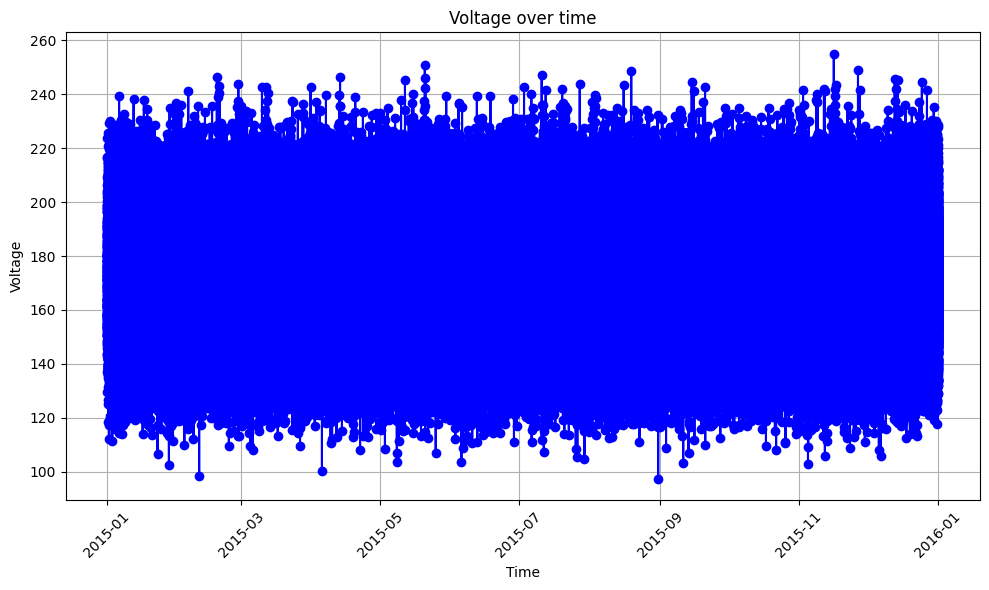

In [19]:
plot_df= telemetry.loc[(telemetry['datetime']>pd.to_datetime('2015-01-01')) & (telemetry['datetime'] < pd.to_datetime('2015-02-01'))]

plt.figure(figsize=(10, 6))
plt.plot(telemetry['datetime'], telemetry['volt'], marker='o', linestyle='-', color='b')

plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Voltage over time')

plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Engineering 


# Identifying Lag Features from Telemetry data on a window of 24 hours

In [20]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3h', closed='left', label='right').mean().unstack())
telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)


temp = []

for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3h', closed='left', label='right').std().unstack())
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + 'sd_3h' for i in fields]
telemetry_sd_3h.reset_index(inplace=True)

telemetry_mean_3h.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


In [21]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                                               index='datetime',
                                               columns='machineID',
                                               values=col).resample('3h',closed='left',
                                                                                label='right',
                                                                                ).first().unstack().rolling(window=24, center=False).mean())
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + 'mean_24h' for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h['voltmean_24h'].isnull()]

temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                                              index='datetime',
                                              columns='machineID',
                                              values=col).resample('3h',
                                                                               closed='left',
                                                                               label='right',
                                                                               ).first().unstack().rolling(window=24, center=False).std())
telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + 'sd_24h' for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h['voltsd_24h'].isnull()]

telemetry_mean_24h.head(10)

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
23,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022
24,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324
25,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216
26,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232
27,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570
28,1,2015-01-04 21:00:00,172.800672,454.497453,100.896227,45.690929
29,1,2015-01-05 00:00:00,171.963248,452.687991,101.312313,45.658369
30,1,2015-01-05 03:00:00,171.206225,448.104961,101.030466,46.457982
31,1,2015-01-05 06:00:00,171.999801,449.729553,101.472850,46.879346
32,1,2015-01-05 09:00:00,171.247302,451.930970,101.368307,47.831655


In [22]:
telemetry_feat= pd.concat([telemetry_mean_3h,
                           telemetry_sd_3h.iloc[:, 2:6],
                           telemetry_mean_24h.iloc[:, 2:6],
                           telemetry_sd_24h.iloc[:, 2:6]], axis=1).dropna()

telemetry_feat.describe()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,291977.000000,291977,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000
mean,50.503899,2015-07-02 19:50:32.314188800,170.777344,446.605536,100.858665,40.384696,13.299177,44.456698,8.885976,4.441105,170.738342,446.622451,100.871860,40.382356,15.055923,50.680485,10.330242,5.103534
min,1.000000,2015-01-01 09:00:00,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,156.713608,310.118604,91.162625,35.800869,6.178154,18.363177,4.275651,2.108104
25%,26.000000,2015-04-02 15:00:00,164.449518,427.559989,96.238713,38.147732,8.027807,26.903727,5.370694,2.684653,168.100594,440.859663,98.730139,39.379127,13.409911,44.992826,8.984156,4.488631
50%,51.000000,2015-07-02 21:00:00,170.434250,448.382424,100.234309,40.145805,12.495649,41.794255,8.346061,4.173937,170.285725,448.772454,100.195972,40.107229,14.942428,50.156537,10.009680,5.008386
75%,76.000000,2015-10-02 03:00:00,176.612207,468.448273,104.406729,42.227512,17.688547,59.105539,11.790367,5.899868,172.609273,456.129192,101.780484,40.908734,16.556760,55.657662,11.199380,5.589524
max,100.000000,2016-01-01 06:00:00,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,206.333895,491.081522,138.291979,55.266429,30.806053,117.198342,30.665847,12.757609
std,28.863913,NaN,9.501061,33.130486,7.414592,3.478391,6.966005,23.217195,4.656154,2.320281,4.178951,15.686284,3.983127,1.764322,2.383652,8.368899,2.129642,0.921640


In [23]:
telemetry_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
23,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,171.536044,456.036706,101.652072,44.017022,13.716658,41.767447,11.754808,6.878286
24,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,171.069056,457.285237,101.011726,44.148324,13.741098,41.038218,11.521602,6.929500
25,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,170.859615,461.116153,101.172241,44.672216,13.915181,33.879652,11.667258,7.162152
26,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,171.566669,457.893518,100.708151,44.993232,13.583969,33.790685,11.447426,7.244618
27,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,171.536866,457.672110,99.826551,45.160570,13.590129,33.787875,11.919716,7.167877


Finding Lag Features from Errors data on windows of 24 hours

In [24]:
error_count= pd.get_dummies(errors.set_index('datetime')).reset_index()

In [25]:
error_count[['errorID_error1', 'errorID_error2', 'errorID_error3', 'errorID_error4', 'errorID_error5']]= error_count[['errorID_error1', 'errorID_error2', 'errorID_error3', 'errorID_error4', 'errorID_error5']].astype(int)

In [26]:
error_count.columns = ['datetime', 'machineID',
                       'error1', 'error2', 'error3', 'error4', 'error5']

In [27]:
error_count.head()

,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-03 07:00:00,1,1,0,0,0,0
1,2015-01-03 20:00:00,1,0,0,1,0,0
2,2015-01-04 06:00:00,1,0,0,0,0,1
3,2015-01-10 15:00:00,1,0,0,0,1,0
4,2015-01-22 10:00:00,1,0,0,0,1,0


In [28]:
error_count= telemetry[['datetime', 'machineID']].merge(error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)

In [29]:
error_count.describe()

,datetime,machineID,error1,error2,error3,error4,error5
count,876403,876403.000000,876403.000000,876403.000000,876403.000000,876403.00000,876403.000000
mean,2015-07-02 18:00:05.931517952,50.499881,0.001152,0.001127,0.000956,0.00083,0.000406
min,2015-01-01 06:00:00,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2015-04-02 12:00:00,25.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2015-07-02 18:00:00,50.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,2015-10-02 00:00:00,76.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,2016-01-01 06:00:00,100.000000,1.000000,1.000000,1.000000,1.00000,1.000000
std,NaN,28.866464,0.033928,0.033557,0.030907,0.02879,0.020150


In [30]:
temp = []
fields = ['error%d' % i for i in range(1, 6)]
for col in fields:
    temp.append(pd.pivot_table(error_count,
                                              index='datetime',
                                              columns='machineID',
                                              values=col).resample('3h',
                                                                               closed='left',
                                                                               label='right',
                                                                               ).first().unstack().rolling(window=24, center=False).sum())
error_count = pd.concat(temp, axis=1)
error_count.columns = [i + 'count' for i in fields]
error_count.reset_index(inplace=True)
error_count = error_count.dropna()
error_count.describe()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
count,292077.000000,292077,292077.000000,292077.000000,292077.000000,292077.000000,292077.000000
mean,50.503898,2015-07-02 21:20:32.317505280,0.037483,0.029266,0.025117,0.025541,0.018666
min,1.000000,2015-01-01 09:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,2015-04-02 15:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,2015-07-02 21:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,76.000000,2015-10-02 03:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,2016-01-01 09:00:00,2.000000,2.000000,1.500000,3.000000,2.000000
std,28.863914,NaN,0.192195,0.154875,0.140627,0.158549,0.134294


In [31]:
error_count.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
23,1,2015-01-04 06:00:00,0.0,0.0,0.0,0.0,0.0
24,1,2015-01-04 09:00:00,0.0,0.0,0.0,0.0,1.0
25,1,2015-01-04 12:00:00,0.0,0.0,0.0,0.0,1.0
26,1,2015-01-04 15:00:00,0.0,0.0,0.0,0.0,1.0
27,1,2015-01-04 18:00:00,0.0,0.0,0.0,0.0,1.0


# Identifying Days Since last replacement using maintainence on a window of 24hours

In [32]:
comp_rep= pd.get_dummies(maint.set_index('datetime')).reset_index()
comp_rep.columns= ['datetime', 'machineID', 'comp1', 'comp2', 'comp3', 'comp4']

comp_rep= telemetry[['datetime', 'machineID']].merge(comp_rep, on=['datetime', 'machineID'], how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])
                                                                   

In [33]:
components=['comp1', 'comp2', 'comp3', 'comp4']
for comp in components:
    comp_rep.loc[comp_rep[comp] < 1, comp]= None
    comp_rep.loc[-comp_rep[comp].isnull(),
                comp]= comp_rep.loc[-comp_rep[comp].isnull(),
                'datetime']
    comp_rep[comp]= comp_rep[comp].fillna(method='ffill')


comp_rep= comp_rep.loc[comp_rep['datetime'] > pd.to_datetime('2015-01-01')]

C:\Users\shash\AppData\Local\Temp\ipykernel_16436\2138639516.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  comp_rep[comp]= comp_rep[comp].fillna(method='ffill')
C:\Users\shash\AppData\Local\Temp\ipykernel_16436\2138639516.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comp_rep[comp]= comp_rep[comp].fillna(method='ffill')
C:\Users\shash\AppData\Local\Temp\ipykernel_16436\2138639516.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  comp_rep[comp]= comp_rep[comp].fillna(method='ffill')
C:\Users\shash\AppData\Local\Temp\ipykernel_16436\2138639516.py:7: FutureWarning: Downcasting object 

In [34]:
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
400,2015-01-01 06:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
502,2015-01-01 07:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
602,2015-01-01 08:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
702,2015-01-01 09:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
802,2015-01-01 10:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00


In [35]:
for comp in components:
    comp_rep[comp]= (comp_rep["datetime"] - pd.to_datetime(comp_rep[comp])) / np.timedelta64(1, "D")
comp_rep.describe()

,datetime,machineID,comp1,comp2,comp3,comp4
count,876823,876823.000000,876823.000000,876823.000000,876823.000000,876823.000000
mean,2015-07-02 18:04:36.939815424,50.499106,53.517611,51.537350,52.722043,53.826833
min,2015-01-01 06:00:00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-04-02 12:00:00,25.000000,13.291667,12.125000,13.125000,13.000000
50%,2015-07-02 18:00:00,50.000000,32.791667,29.666667,32.250000,32.500000
75%,2015-10-02 00:00:00,75.000000,68.708333,66.541667,67.333333,70.458333
max,2016-01-01 06:00:00,100.000000,491.958333,348.958333,370.958333,394.958333
std,NaN,28.866046,62.490219,59.271457,58.875826,59.704062


In [36]:
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
400,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
502,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
602,2015-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333
702,2015-01-01 09:00:00,1,19.125000,214.125000,154.125000,169.125000
802,2015-01-01 10:00:00,1,19.166667,214.166667,154.166667,169.166667


# Machine Features: Descriptive stats about Machine

In [37]:
final_feat= telemetry_feat.merge(
    error_count, on=['datetime', 'machineID'], how='left')

final_feat= final_feat.merge(
    comp_rep, on=['datetime', 'machineID'], how='left')

final_feat= final_feat.merge(machines, on=['machineID'], how='left')

final_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age
0,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,...,0.0,0.0,0.0,0.0,22.000,217.000,157.000,172.000,model3,18
1,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,0.0,0.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18
2,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,0.0,0.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18
3,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,0.0,0.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18
4,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,0.0,0.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18


In [38]:
final_feat.describe()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,292698.000000,292698,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,...,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000
mean,50.501268,2015-07-02 20:05:53.336203520,170.784219,446.575340,100.864117,40.386506,13.300159,44.453806,8.886790,4.441220,...,0.037758,0.029442,0.025289,0.025712,0.018841,53.444887,51.452085,52.640758,53.737431,11.329497
min,1.000000,2015-01-01 09:00:00,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,2015-04-02 15:00:00,164.452628,427.534759,96.239740,38.147926,8.027559,26.903316,5.370347,2.684286,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.250000,12.125000,13.125000,13.000000,7.000000
50%,50.000000,2015-07-02 21:00:00,170.436600,448.367055,100.236344,40.146085,12.496284,41.792210,8.347255,4.173691,...,0.000000,0.000000,0.000000,0.000000,0.000000,32.750000,29.625000,32.125000,32.375000,12.000000
75%,75.000000,2015-10-02 03:00:00,176.619220,468.434339,104.409335,42.228807,17.690501,59.099500,11.791536,5.900380,...,0.000000,0.000000,0.000000,0.000000,0.000000,68.625000,66.375000,67.250000,70.375000,16.000000
max,100.000000,2016-01-01 06:00:00,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,...,2.000000,2.000000,1.500000,3.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000
std,28.863879,NaN,9.509413,33.161392,7.423015,3.481097,6.967073,23.216722,4.656677,2.320464,...,0.192877,0.155121,0.140891,0.159066,0.134849,62.477055,59.241774,58.860338,59.673951,5.827516


# Construction of Labels

In [39]:
labeled_features= final_feat.merge(
    failures, on=['datetime', 'machineID'], how='left')

labeled_featuers= labeled_features.fillna(
    method='bfill', limit=7)

labeled_features= labeled_features.fillna('none')
labeled_features.head()

C:\Users\shash\AppData\Local\Temp\ipykernel_16436\901816491.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  labeled_featuers= labeled_features.fillna(


,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,...,0.0,0.0,0.0,22.000,217.000,157.000,172.000,model3,18,none
1,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,0.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,none
2,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,0.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,none
3,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,0.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18,none
4,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,0.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18,none


In [40]:
labeled_features.loc[labeled_features['failure']== 'comp4'][:16]

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
8,1,2015-01-05 06:00:00,185.782709,439.531288,99.413660,51.558082,14.495664,45.663743,4.289212,7.330397,...,0.000000,0.0,1.000000,23.0,218.0,158.0,0.0,model3,18,comp4
9,1,2015-01-05 06:00:00,185.782709,439.531288,99.413660,51.558082,14.495664,45.663743,4.289212,7.330397,...,0.000000,0.0,1.000000,0.0,218.0,158.0,0.0,model3,18,comp4
1332,1,2015-06-19 06:00:00,172.059069,463.242610,96.905050,53.701413,14.757880,55.874000,3.204981,2.329615,...,0.000000,0.0,1.000000,0.0,30.0,15.0,135.0,model3,18,comp4
1333,1,2015-06-19 06:00:00,172.059069,463.242610,96.905050,53.701413,14.757880,55.874000,3.204981,2.329615,...,0.000000,0.0,1.000000,0.0,30.0,15.0,0.0,model3,18,comp4
1933,1,2015-09-02 06:00:00,165.530175,413.547130,103.631528,60.142846,9.088618,49.918671,14.438808,5.389723,...,0.000000,0.0,1.000000,0.0,60.0,90.0,75.0,model3,18,comp4
1934,1,2015-09-02 06:00:00,165.530175,413.547130,103.631528,60.142846,9.088618,49.918671,14.438808,5.389723,...,0.000000,0.0,1.000000,0.0,60.0,90.0,0.0,model3,18,comp4
2777,1,2015-12-16 06:00:00,188.941806,421.756494,86.684047,51.410144,35.295874,7.839110,9.139511,3.598700,...,0.000000,0.0,1.000000,75.0,30.0,15.0,0.0,model3,18,comp4
17732,7,2015-01-24 06:00:00,177.669082,361.502737,109.447331,46.975392,8.531048,29.773424,4.384169,5.187506,...,0.333333,0.0,0.333333,207.0,0.0,207.0,57.0,model3,20,comp4
17734,7,2015-01-24 06:00:00,177.669082,361.502737,109.447331,46.975392,8.531048,29.773424,4.384169,5.187506,...,0.333333,0.0,0.333333,207.0,0.0,207.0,0.0,model3,20,comp4
18577,7,2015-05-09 06:00:00,175.911702,467.458682,103.589910,52.610306,12.400140,69.604586,11.162580,1.658487,...,0.000000,0.0,1.000000,0.0,30.0,45.0,105.0,model3,20,comp4


# Modelling

In [41]:
threshold_dates = [[pd.to_datetime('2015-07-31 01:00:00'), pd.to_datetime('2015-08-01 01:00:00')],
                   [pd.to_datetime('2015-08-31 01:00:00'),
                    pd.to_datetime('2015-09-01 01:00:00')],
                   [pd.to_datetime('2015-09-30 01:00:00'), pd.to_datetime('2015-10-01 01:00:00')]]

test_results = []
anai_models = []
train_dfs = []
for last_train_date, first_test_date in threshold_dates:
    print('Training on %s to %s' % (last_train_date, first_test_date))
    train_y = labeled_features.loc[labeled_features['datetime']
                                   < last_train_date, 'failure']
    train_X = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] < last_train_date].drop(['datetime',
                                                                                                        'machineID',
                                                                                                        'failure'], axis= 1))
    df = pd.concat([train_X, train_y], axis=1)
    train_dfs.append(df)

Training on 2015-07-31 01:00:00 to 2015-08-01 01:00:00
Training on 2015-08-31 01:00:00 to 2015-09-01 01:00:00
Training on 2015-09-30 01:00:00 to 2015-10-01 01:00:00


In [42]:
labeled_features.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,...,0.0,0.0,0.0,22.000,217.000,157.000,172.000,model3,18,none
1,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,0.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,none
2,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,0.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,none
3,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,0.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18,none
4,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,0.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18,none


# Modelling on 1st Threshold

In [43]:
train_dfs[1].head()

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,...,comp1,comp2,comp3,comp4,age,model_model1,model_model2,model_model3,model_model4,failure
0,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,171.536044,456.036706,...,22.000,217.000,157.000,172.000,18,False,False,True,False,none
1,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,171.069056,457.285237,...,22.125,217.125,157.125,172.125,18,False,False,True,False,none
2,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,170.859615,461.116153,...,22.250,217.250,157.250,172.250,18,False,False,True,False,none
3,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,171.566669,457.893518,...,22.375,217.375,157.375,172.375,18,False,False,True,False,none
4,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,171.536866,457.672110,...,22.500,217.500,157.500,172.500,18,False,False,True,False,none


In [44]:
train_dfs[0]['failure'].value_counts()

failure
none     168373
comp2       215
comp1       190
comp4       149
comp3       111
Name: count, dtype: int64

In [45]:
for i, df in enumerate(train_dfs):
    df[['model_model1', 'model_model2', 'model_model3', 'model_model4']] = df[['model_model1', 'model_model2', 'model_model3', 'model_model4']].astype(int)
    train_dfs[i] = df


In [46]:
train_dfs[0]

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,...,comp1,comp2,comp3,comp4,age,model_model1,model_model2,model_model3,model_model4,failure
0,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,171.536044,456.036706,...,22.000,217.000,157.000,172.000,18,0,0,1,0,none
1,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,171.069056,457.285237,...,22.125,217.125,157.125,172.125,18,0,0,1,0,none
2,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,170.859615,461.116153,...,22.250,217.250,157.250,172.250,18,0,0,1,0,none
3,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,171.566669,457.893518,...,22.375,217.375,157.375,172.375,18,0,0,1,0,none
4,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,171.536866,457.672110,...,22.500,217.500,157.500,172.500,18,0,0,1,0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291541,181.789600,443.816655,95.819894,39.563678,4.020958,16.224728,7.755167,2.474557,168.711921,455.964639,...,3.250,3.250,18.250,63.250,5,0,0,0,1,none
291542,173.083263,438.704284,94.424390,39.083103,11.783864,66.494982,9.682734,6.214271,169.123090,454.870037,...,3.375,3.375,18.375,63.375,5,0,0,0,1,none
291543,174.048390,433.016353,99.925802,40.676765,4.574859,25.076437,11.605534,5.577813,169.428252,451.809900,...,3.500,3.500,18.500,63.500,5,0,0,0,1,none
291544,167.883990,435.511531,96.602542,38.877619,10.131349,55.710554,1.266057,7.099589,169.641578,448.168972,...,3.625,3.625,18.625,63.625,5,0,0,0,1,none


In [ ]:
'''
import anai
from anai.preprocessing import Preprocessor

ai1= anai.run(target= 'failure', df= train_dfs[0], predictor= ['xgb', 'cat', 'lgbm', 'gbc', 'rfc'], ensemble= False)
'''

In [48]:
import lightgbm as lgb
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [56]:
train_dfs[0].shape

(169038, 31)

In [63]:
x1= train_dfs[0].drop('failure', axis=1)

In [64]:
y1= train_dfs[0]['failure']

In [75]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
y1= lb.fit_transform(y1)

In [76]:
y1

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [77]:
x1.head()

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,...,error5count,comp1,comp2,comp3,comp4,age,model_model1,model_model2,model_model3,model_model4
0,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,171.536044,456.036706,...,0.0,22.000,217.000,157.000,172.000,18,0,0,1,0
1,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,171.069056,457.285237,...,1.0,22.125,217.125,157.125,172.125,18,0,0,1,0
2,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,170.859615,461.116153,...,1.0,22.250,217.250,157.250,172.250,18,0,0,1,0
3,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,171.566669,457.893518,...,1.0,22.375,217.375,157.375,172.375,18,0,0,1,0
4,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,171.536866,457.672110,...,1.0,22.500,217.500,157.500,172.500,18,0,0,1,0


In [78]:
x_train, x_test, y_train, y_test= train_test_split(x1, y1, test_size=0.2, random_state= 42)

In [79]:
models= {
    "LightGBM":lgb.LGBMClassifier(),
    "CatBoost":CatBoostClassifier(verbose= 0),
    "XGBoost" :XGBClassifier(use_label_encoder= False, eval_metric='logloss'),
    "GBC": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    preds= model.predict(x_test)
    accuracy= accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {accuracy}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5155
[LightGBM] [Info] Number of data points in the train set: 135230, number of used features: 30
[LightGBM] [Info] Start training from score -6.810786
[LightGBM] [Info] Start training from score -6.644248
[LightGBM] [Info] Start training from score -7.372081
[LightGBM] [Info] Start training from score -7.002548
[LightGBM] [Info] Start training from score -0.003949
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\shash\.conda\envs\deeplearning\lib\site-packages\xgboost\core.py:158: UserWarning: [19:30:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9987576904874585
GBC Accuracy: 0.9978111689540937


In [81]:
import joblib

joblib.dump(model, "model.pkl")

['model.pkl']

In [82]:
loaded_model= joblib.load("model.pkl")